# Redes Neurais Convolucionais (CNN)


`Redes Neurais Convolucionais` podem ser utilizadas para descobrir padrões contidos em uma imagem. 

Tradicionalmente uma `CNN` é composta por um conjunto de camadas de `Convolução + Ativação + Pooling`, seguida de uma `Camada Completamente Conectada` que funciona como uma função de distribuição de probabilidades.


As CNN são bastante utilizadas em 2 tipos de problemas:
- Classificação de imagens
- Segmentação de imagens

<img src='images/cnn_padrao.png' />


### Exemplificando o `Filtro Convolucional`: 
<img src='images/conv-full-layer.gif'/>

### Exemplificando a `Função de Ativação ReLU`: 
<img src='images/relu.jpeg'/>

### Exemplificando o `Filtro Max Pooling`:
<img src='images/maxpool_animation.gif'/>

### Exemplificando a classificação de uma imagem:
<img src='images/cnn.gif'/>


- https://towardsdatascience.com/review-fcn-semantic-segmentation-eb8c9b50d2d1
- https://www.guru99.com/convnet-tensorflow-image-classification.html
- https://medium.com/x8-the-ai-community/cnn-9c5e63703c3f
- https://compsci682.github.io/notes/convolutional-networks/
 
- http://setosa.io/ev/image-kernels/
- https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1


# Algumas redes famosas

- [LeNet](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf) - A primeira aplicação bem sucessida de uma CNN foi desenvolvida por Yann LeCun em 1998.

- [AlexNet](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) - Esse foi o primeiro trabalho que popularizou a utilização de CNN na área de visão computacional.

- [VGGNet](http://www.robots.ox.ac.uk/~vgg/research/very_deep/) - 

- [ResNet](https://arxiv.org/pdf/1512.03385.pdf) - 

- [U-Net](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/) - 

# Temas de otimização

- Data Augmentation
- Transfer Learning
- Visualizing what ConvNets learn

# Carregando a imagem de exemplo

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

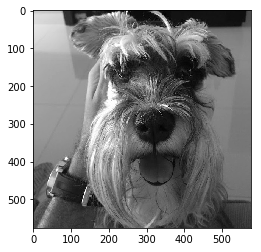

In [9]:
img_path = 'images/pedrita.jpg'

# carrega a imagem colorida
rgb_img = cv2.imread(img_path)

# converte para niveis de cinza
gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)

# normaliza a imagem entre [0,1]
gray_img = gray_img.astype("float32")/255

# exibe a imagem em niveis de cinza
plt.imshow(gray_img, cmap='gray')
plt.show()

# Definindo os filtros (fixos) que serão utilizados como pesos

In [2]:
import numpy as np

# Criando um exemplo utilizando 4 filtros convolucionais
filter_1 = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])
#filter_1 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

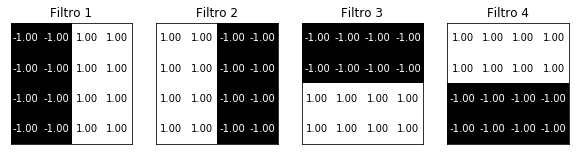

In [9]:
# funcao auxiliar para visualizacao dos filtros
def viz_filter(filters):
    
    fig = plt.figure(figsize=(10, 5))
    #fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
    for i in range(filters.shape[0]):
        ax = fig.add_subplot(1, filters.shape[0], i+1, xticks=[], yticks=[])
        ax.imshow(filters[i], cmap='gray')
        ax.set_title('Filtro %s' % str(i+1))
        width, height = filters[i].shape
        
        for x in range(width):
            for y in range(height):
                #ax.annotate(str(filters[i][x][y]), xy=(y,x),
                ax.annotate("{:.2f}".format(filters[i][x][y]), xy=(y,x),
                            horizontalalignment='center',
                            verticalalignment='center',
                            color='white' if filters[i][x][y]<0 else 'black')

# Visualizando os filtros criados
viz_filter(filters)

# Definindo o modelo CNN 

In [55]:
import torch
import torch.nn as nn
import torch.nn.functional as F
  
# Definindo uma CNN com 1 camada convolucional, 1 camada de pooling e funcao de ativacao ReLU
# A camada convolucional utilizara os 4 filtros definidos anteriormente com stride de 1 e padding de 0
# A camada de pooling sera do tipo max pooling com janela 2x2 e stride de 2
class Net(nn.Module):
    
    def __init__(self, weight=0):
        super(Net, self).__init__()
        
        # Configura a camada convolucional: https://pytorch.org/docs/stable/nn.html#conv2d
        if (isinstance(weight, int)):            
            self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=4, stride=1, padding=0, bias=False)
            
        else:
            # inicializa manualmente os pesos da camada convolucional como sendo os 4 filtros definidos anteriormente
            k_height, k_width = weight.shape[2:]
            self.conv1 = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
            self.conv1.weight = torch.nn.Parameter(weight)
        
        # camada de max pooling: https://pytorch.org/docs/stable/nn.html#maxpool2d
        self.pool = nn.MaxPool2d(2, 2) 

    def forward(self, x):
                
        # aplica a convolucao
        conv_x = self.conv1(x)
        
        # aplica a funcao de ativacao ReLU na saida da camada convolucional
        activated_x = F.relu(conv_x)
        
        # aplica a funcao pooling na saida da funcao de ativivacao
        pooled_x = self.pool(activated_x)
        
        # retorna todas as saidas separadamente
        return torch.squeeze(self.conv1.weight).detach().numpy(),conv_x, activated_x, pooled_x, x
    
# instancia o modelo criado passando os filtros como pesos
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)
#model = Net()

# mostra as camadas do modelo criado
print(model)

Net(
  (conv1): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


### Visualizando a saída das camadas

In [56]:
# funcao auxiliar para visualizacao da saida de uma determinada camada
def viz_layer(layer, n_filters= 4):
    
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1)
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Saida %s' % str(i+1))

In [57]:
# converte a imagem num tensor PyTorch de entrada
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# executa o modelo
kernels_inicio, conv_layer, activated_layer, pooled_layer, x = model(gray_img_tensor)

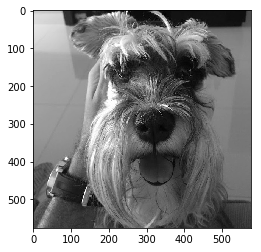

In [58]:
# exibe a imagem original
plt.imshow(gray_img, cmap='gray')

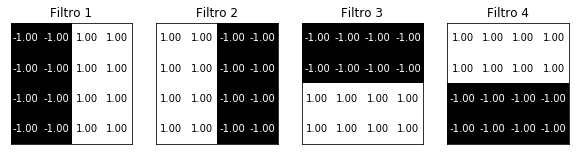

In [59]:
# visualiza os filtros
viz_filter(kernels_inicio)

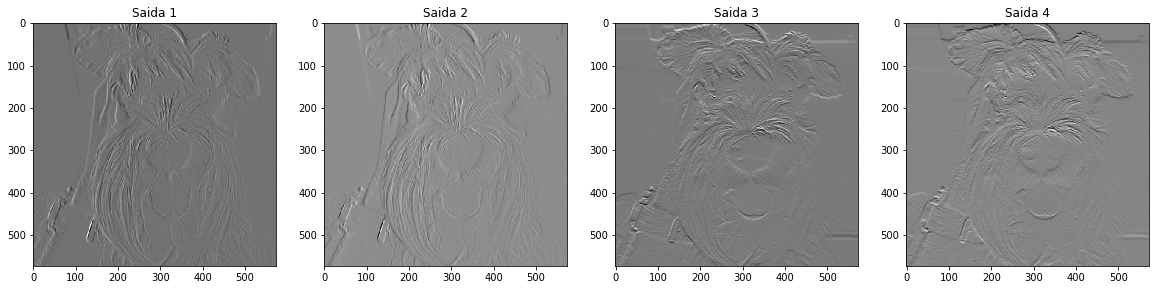

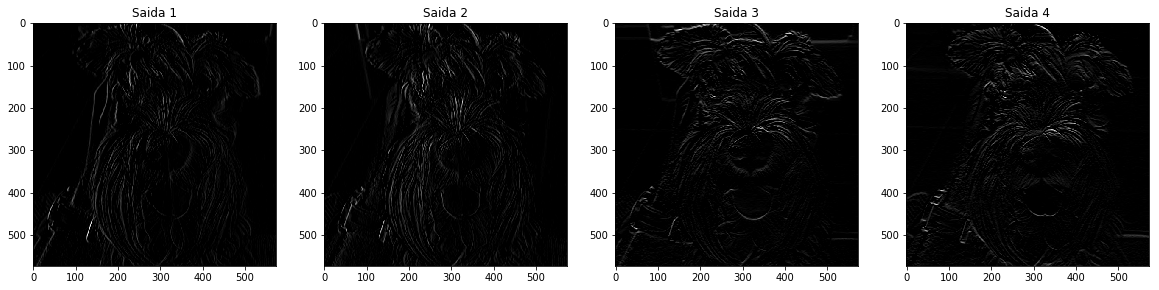

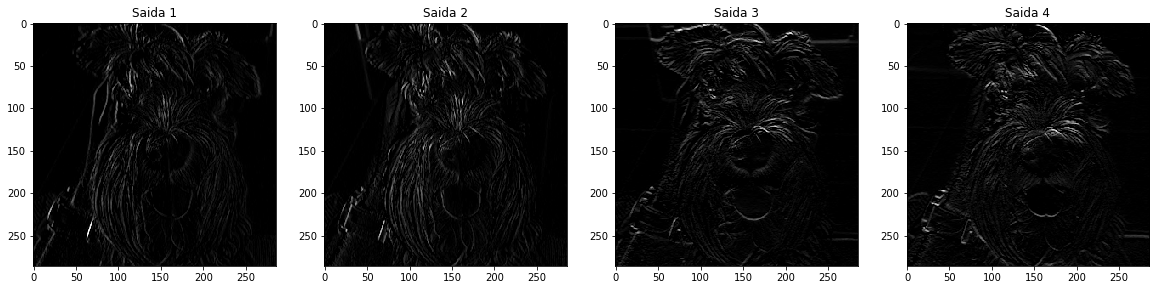

In [60]:
# visualiza a saida das camadas convolucional, funcao de ativacao e pooling
viz_layer(conv_layer)
viz_layer(activated_layer)
viz_layer(pooled_layer)

## Aumentando as imagens da base

In [30]:
import os, os.path, random
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# All images are resized to 500 x 500 and normalized
# Only training images receive further augmentation
dataset_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(512),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(p=0.2),
        transforms.RandomRotation(20),
        #transforms.Grayscale(num_output_channels=3),
        transforms.RandomAffine(degrees=5, translate=(0.1, 0.1), scale=(1.0, 1.1), shear=5, resample=False, fillcolor=0),
        transforms.RandomApply([transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1)], p=0.5),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # normaliza os pixels para 0..1
    ]),
    'val': transforms.Compose([
        transforms.Resize(size=512),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]),
    'test': transforms.Compose([
        transforms.Resize(size=512),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]),    
}

dataset_dir = "datasets/dogs"
image_datasets = {x: datasets.ImageFolder(os.path.join(dataset_dir, x), dataset_transforms[x]) for x in ['train', 'val', 'test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=20, shuffle=False, num_workers=4) for x in ['train', 'val', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val', 'test']}

class_names = image_datasets['train'].classes
n_classes = len(class_names)

print(f"Qtd de imagens de treinamento: {dataset_sizes['train']}")
print(f"Qtd de imagens de validação: {dataset_sizes['val']}")
print(f"Qtd de imagens de teste: {dataset_sizes['test']}")
print(f"Classes: {class_names}")

Qtd de imagens de treinamento: 10
Qtd de imagens de validação: 10
Qtd de imagens de teste: 2
Classes: ['pedrita']


#### Imagens originais

In [31]:
# helper function to un-normalize and display an image
def dataset_show(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

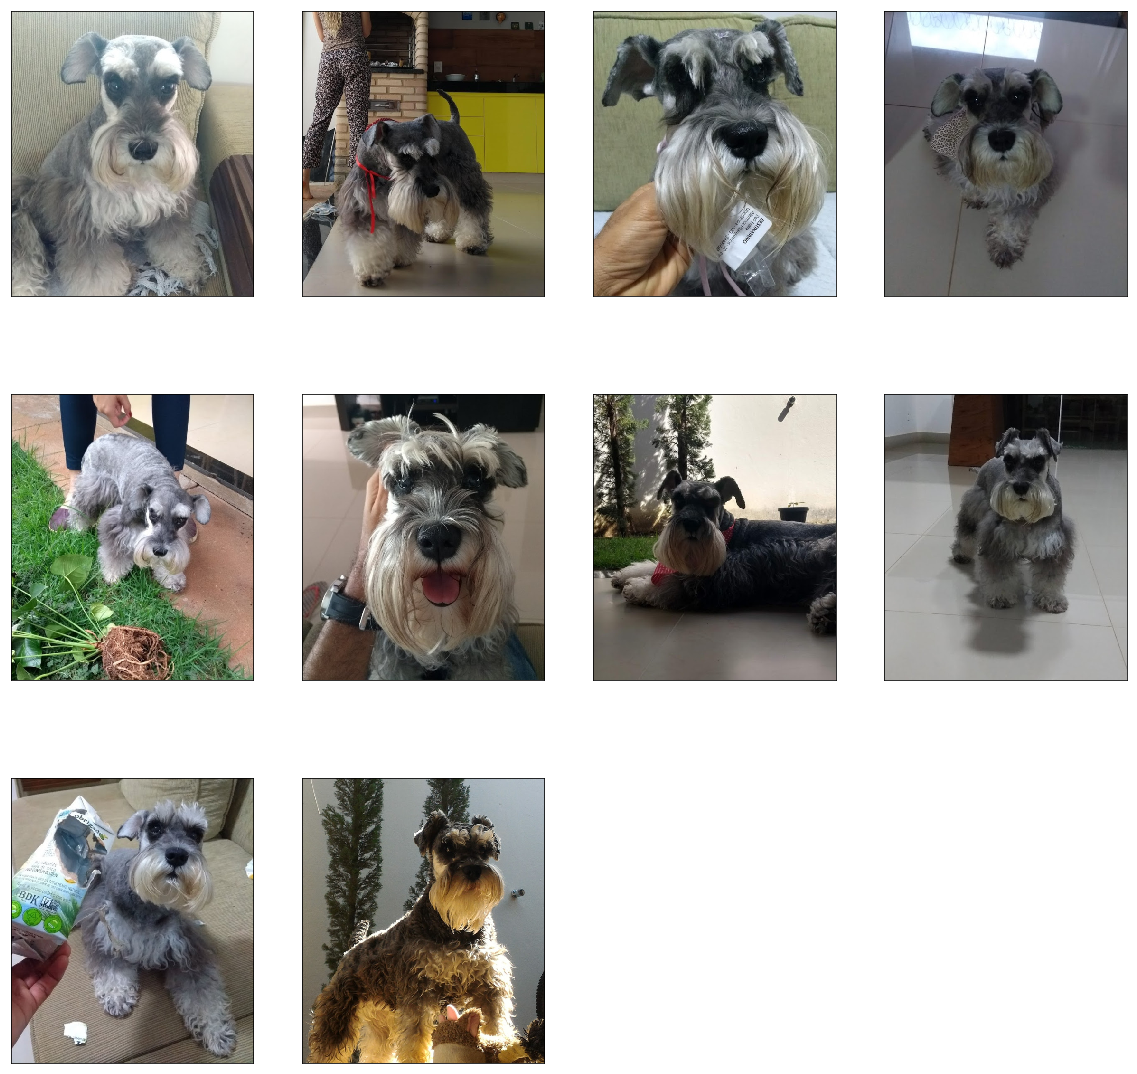

In [32]:
# obtem um lote das imagens de treinamento
images, classes = next(iter(dataloaders['val'])) 
images = images.numpy() 
fig = plt.figure(figsize=(20, 20))
for idx in np.arange(10):
    ax = fig.add_subplot(3, 4, idx+1, xticks=[], yticks=[])
    dataset_show(images[idx])


#### Imagens aumentadas

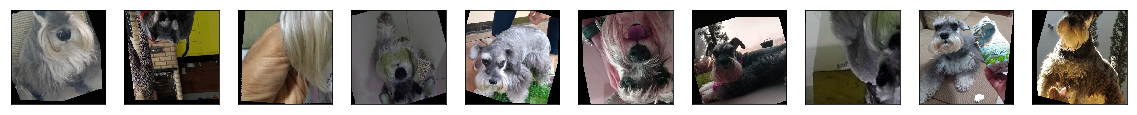

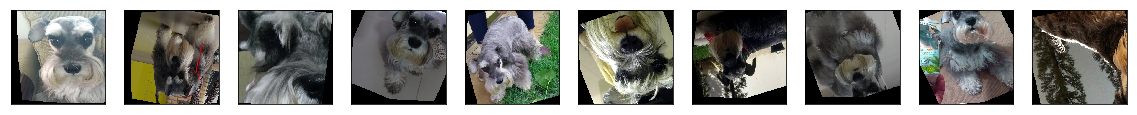

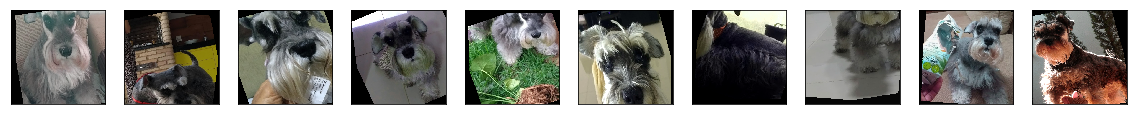

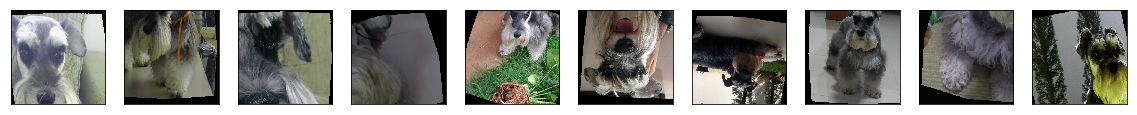

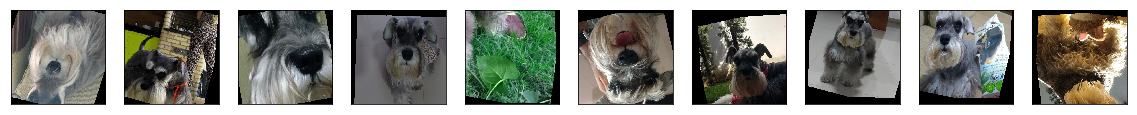

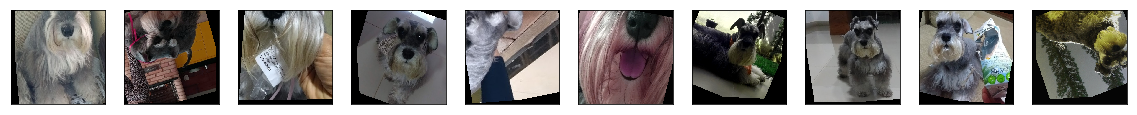

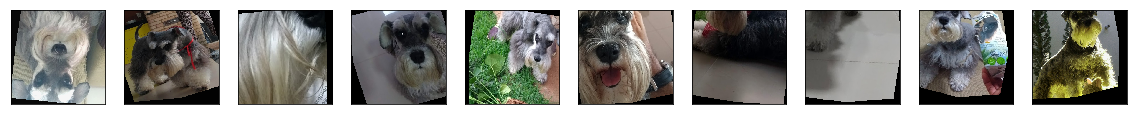

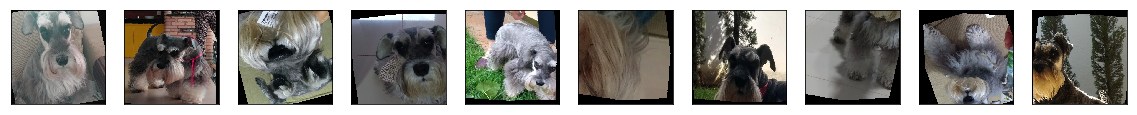

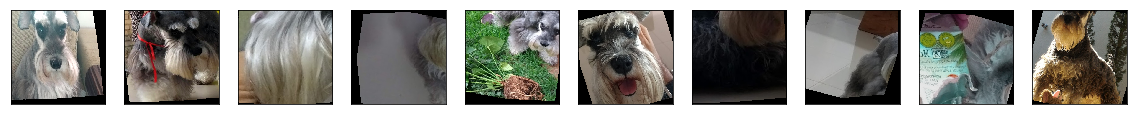

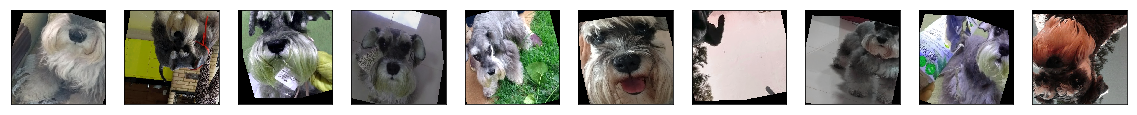

In [33]:
# obtem 10 lotes das imagens aumentadas
for i in range(10):
    
    # obtem um lote das imagens aumentadas
    images, classes = next(iter(dataloaders['train'])) 
    images = images.numpy() 
    fig = plt.figure(figsize=(20, 20))
    for idx in np.arange(10):
        ax = fig.add_subplot(1, 10, idx+1, xticks=[], yticks=[])
        dataset_show(images[idx])

In [507]:
import time

def train_model(model, criterion, optimizer, num_epochs=25):
    
    since = time.time()
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        model.train()  # Set model to training mode
        
        running_loss = 0.0
        running_corrects = 0

        # Iterate over data.
        for inputs, labels in dataloaders['train']:

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward
            # track history if only in train
            with torch.set_grad_enabled(True):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                loss.backward()
                optimizer.step()

            # statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        print('Loss: {:.4f} | Acc: {:.4f}'.format(epoch_loss, epoch_acc))
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    
    return model

In [508]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [509]:
model = Net()
print(model)

model = train_model(model, criterion, optimizer, num_epochs=20)

Net(
  (conv1): Conv2d(3, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(4, 16, kernel_size=(4, 4), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(4, 4), stride=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1))
  (conv5): Conv2d(64, 128, kernel_size=(4, 4), stride=(1, 1))
  (fc1): Linear(in_features=28800, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
  (dropout): Dropout(p=0.25)
)
Epoch 1/20
----------
21632


RuntimeError: invalid argument 2: size '[-1 x 28800]' is invalid for input with 216320 elements at /opt/conda/conda-bld/pytorch_1533672544752/work/aten/src/TH/THStorage.cpp:80

In [400]:

images, classes = next(iter(dataloaders['train'])) 

model = Net()
print(model)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

Net(
  (conv1): Conv2d(3, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


TypeError: max() received an invalid combination of arguments - got (tuple, int), but expected one of:
 * (Tensor input)
 * (Tensor input, Tensor other, Tensor out)
 * (Tensor input, int dim, bool keepdim, tuple of Tensors out)
